In [1]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Dataset C.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   
  inflating: training-c/c19324.png   

In [4]:
class CustomDatasetmine(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    return len(self.annotations)
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
    image= io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

    if self.transform:
      image=self.transform(image)
    return (image, y_label)

In [5]:
data = CustomDatasetmine("/content/training-c.csv","/content/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(32, 32)), transforms.ToTensor()]))
train_set, test_set = torch.utils.data.random_split(data,[19438,4860])

In [6]:
data.__len__()

24298

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 32*32 # num_features = 784
num_hidden = 200
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2999207973480225. Accuracy: 9.074074074074074
Iteration: 1000. Loss: 2.303501844406128. Accuracy: 9.197530864197532
Iteration: 1500. Loss: 2.3030407428741455. Accuracy: 9.794238683127572
Iteration: 2000. Loss: 2.2973930835723877. Accuracy: 9.074074074074074
Iteration: 2500. Loss: 2.304732322692871. Accuracy: 9.197530864197532
Iteration: 3000. Loss: 2.2988650798797607. Accuracy: 9.074074074074074
Iteration: 3500. Loss: 2.2963509559631348. Accuracy: 9.074074074074074
Iteration: 4000. Loss: 2.298217296600342. Accuracy: 9.197530864197532
Iteration: 4500. Loss: 2.3016586303710938. Accuracy: 9.197530864197532
Iteration: 5000. Loss: 2.299363851547241. Accuracy: 9.197530864197532
Iteration: 5500. Loss: 2.3014039993286133. Accuracy: 9.074074074074074
Iteration: 6000. Loss: 2.302075147628784. Accuracy: 9.197530864197532
Iteration: 6500. Loss: 2.3133997917175293. Accuracy: 9.074074074074074
Iteration: 7000. Loss: 2.3063535690307617. Accuracy: 9.197530864197532
Iteration: 7

[2.2999207973480225, 2.303501844406128, 2.3030407428741455, 2.2973930835723877, 2.304732322692871, 2.2988650798797607, 2.2963509559631348, 2.298217296600342, 2.3016586303710938, 2.299363851547241, 2.3014039993286133, 2.302075147628784, 2.3133997917175293, 2.3063535690307617, 2.3019609451293945, 2.3055453300476074, 2.293604612350464, 2.3021304607391357, 2.301344633102417, 2.301650285720825, 2.3088762760162354, 2.305349826812744, 2.2984094619750977, 2.2985947132110596, 2.3009846210479736, 2.312939405441284, 2.300358295440674, 2.3067946434020996, 2.2992241382598877, 2.2987570762634277, 2.3026111125946045, 2.303093433380127, 2.3088879585266113, 2.3016371726989746, 2.3038687705993652, 2.302828311920166, 2.2988147735595703, 2.2979538440704346]


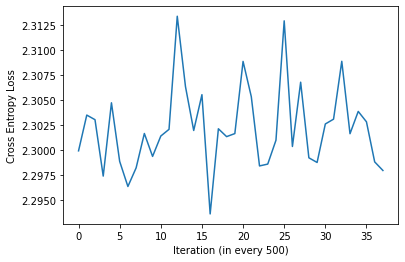

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 50000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.303426742553711. Accuracy: 9.48559670781893
Iteration: 1000. Loss: 2.3002281188964844. Accuracy: 9.48559670781893
Iteration: 1500. Loss: 2.302912712097168. Accuracy: 9.423868312757202
Iteration: 2000. Loss: 2.302415132522583. Accuracy: 9.423868312757202
Iteration: 2500. Loss: 2.303797721862793. Accuracy: 9.423868312757202
Iteration: 3000. Loss: 2.3035597801208496. Accuracy: 9.423868312757202
Iteration: 3500. Loss: 2.301957130432129. Accuracy: 9.423868312757202
Iteration: 4000. Loss: 2.3028550148010254. Accuracy: 9.423868312757202
Iteration: 4500. Loss: 2.304037570953369. Accuracy: 9.423868312757202
Iteration: 5000. Loss: 2.302222967147827. Accuracy: 9.423868312757202
Iteration: 5500. Loss: 2.3026247024536133. Accuracy: 9.423868312757202
Iteration: 6000. Loss: 2.302152156829834. Accuracy: 9.423868312757202
Iteration: 6500. Loss: 2.3025786876678467. Accuracy: 9.423868312757202
Iteration: 7000. Loss: 2.3042452335357666. Accuracy: 9.423868312757202
Iteration: 7500. 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

NameError: ignored

In [8]:
# Hyperparameters
batch_size = 80
num_iters = 70000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

      

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

     
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3000619411468506. Accuracy: 9.609053497942387
Iteration: 1000. Loss: 2.302382707595825. Accuracy: 9.609053497942387
Iteration: 1500. Loss: 2.304649829864502. Accuracy: 9.588477366255145
Iteration: 2000. Loss: 2.3039956092834473. Accuracy: 10.0
Iteration: 2500. Loss: 2.301112651824951. Accuracy: 14.691358024691358
Iteration: 3000. Loss: 2.3016178607940674. Accuracy: 13.539094650205762
Iteration: 3500. Loss: 2.303061008453369. Accuracy: 9.588477366255145
Iteration: 4000. Loss: 2.2993247509002686. Accuracy: 17.674897119341562
Iteration: 4500. Loss: 2.2988944053649902. Accuracy: 9.753086419753087
Iteration: 5000. Loss: 2.2956125736236572. Accuracy: 18.68312757201646
Iteration: 5500. Loss: 2.29608154296875. Accuracy: 9.609053497942387
Iteration: 6000. Loss: 2.2958762645721436. Accuracy: 19.46502057613169
Iteration: 6500. Loss: 2.29317045211792. Accuracy: 21.008230452674898
Iteration: 7000. Loss: 2.2895891666412354. Accuracy: 14.320987654320987
Iteration: 7500. Loss: 

[2.3000619411468506, 2.302382707595825, 2.304649829864502, 2.3039956092834473, 2.301112651824951, 2.3016178607940674, 2.303061008453369, 2.2993247509002686, 2.2988944053649902, 2.2956125736236572, 2.29608154296875, 2.2958762645721436, 2.29317045211792, 2.2895891666412354, 2.2890372276306152, 2.271493434906006, 2.246364116668701, 2.2700722217559814, 2.2325472831726074, 2.165105104446411, 2.2064921855926514, 2.1973588466644287, 2.3010787963867188, 2.109302043914795, 2.310283899307251, 2.237640857696533, 2.265986919403076, 2.1980369091033936, 2.125525712966919, 2.199094295501709, 2.0763497352600098, 2.1554365158081055, 2.261418104171753, 2.4077341556549072, 2.1273419857025146, 1.9579181671142578, 2.068206310272217, 2.0007665157318115, 1.9472682476043701, 2.0117061138153076, 1.9936240911483765, 1.8240770101547241, 2.1175217628479004, 2.0859780311584473, 2.1830458641052246, 2.035177707672119, 1.8811094760894775, 2.03751277923584, 1.8156166076660156, 2.1834616661071777, 2.110971689224243, 2.

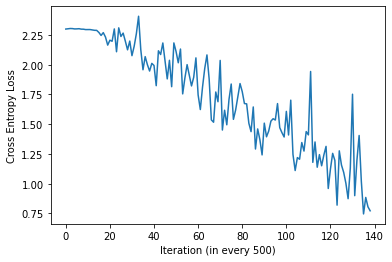

In [9]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()